# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

## Haberman dataset

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
hab = pd.read_csv("haberman.csv")

In [115]:
import warnings 

warnings.filterwarnings("ignore")

In [116]:
hab.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [117]:
print (hab.shape)
hab['age'].max()

(306, 4)


83

In [118]:
print (hab.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [119]:
hab["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

Observation:
From the dataset, it looks like  the number of patients that lived more than 5 years is almost double of the ones that did not. 

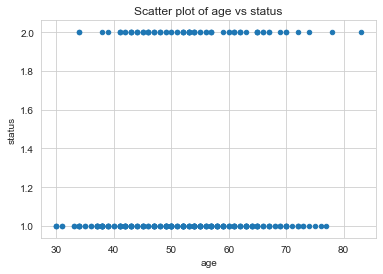

In [120]:

hab.plot(kind='scatter', x='age', y='status') ;
plt.title('Scatter plot of age vs status')
plt.show()


Observation:#Cant make musch sense from it

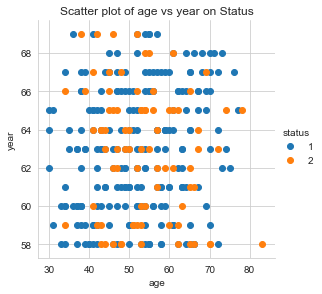

In [121]:
sns.set_style("whitegrid");
sns.FacetGrid(hab, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('Scatter plot of age vs year on Status')
plt.show();


#There is not a definitive pattern here. Nothing intuitive

In [122]:
age_b50=hab[hab['age']<=60]['status'].value_counts()
age_b50

1    170
2     59
Name: status, dtype: int64

In [123]:
age_a50=hab[hab['age']>60]['status'].value_counts()
age_a50



1    55
2    22
Name: status, dtype: int64

#It looks like the death rate is higher in people with age more than 60 

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

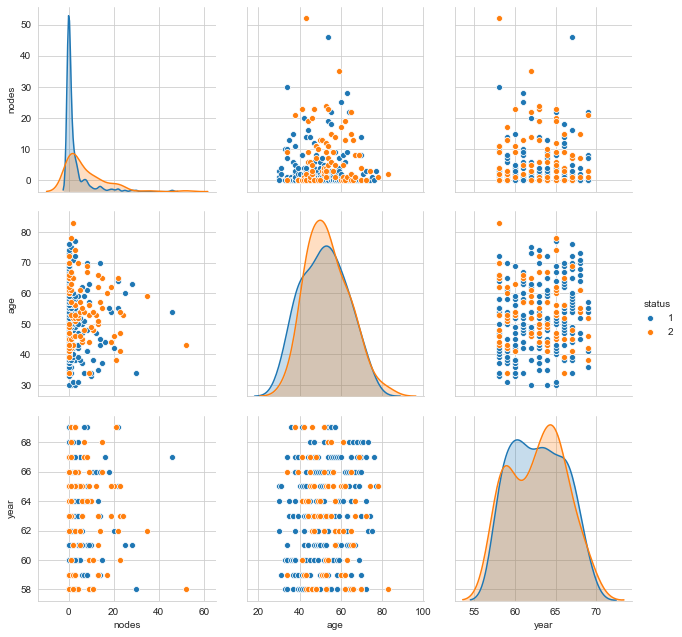

In [124]:

plt.close();
sns.set_style("whitegrid");
sns.pairplot(hab,vars={'age','year','nodes'}, hue="status", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1.Nodes vs Year plot is readable compared to the others

# (3.4) Histogram, PDF, CDF

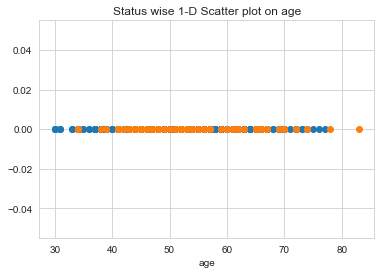

In [125]:

import numpy as np
hab_1 = hab.loc[hab["status"] == 1];
hab_2 = hab.loc[hab["status"] == 2];

plt.plot(hab_1["age"], np.zeros_like(hab_1['year']), 'o')
plt.plot(hab_2["age"], np.zeros_like(hab_2['year']), 'o')
plt.title('Status wise 1-D Scatter plot on age')
plt.xlabel('age')
plt.show()

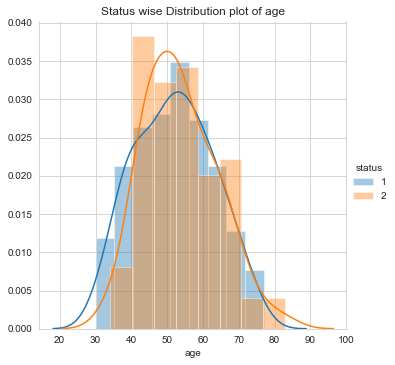

In [126]:
sns.FacetGrid(hab, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Status wise Distribution plot of age')
plt.show();



A lot of overlapping can been seen. There is no definitive obervation
People whose age is around 30–40 are more likely to survive, and 40–60 are less likely to survive. 
While people whose age around 60–75 have equal chances of surviving and not surviving

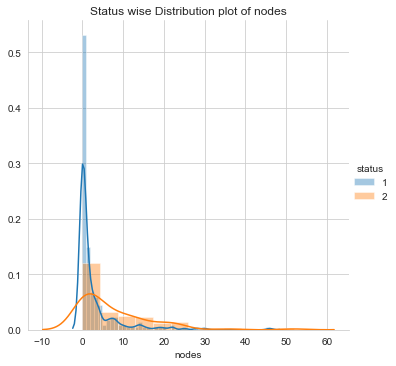

In [127]:
sns.FacetGrid(hab, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Status wise Distribution plot of nodes')
plt.show();



Patients with 0 to 1 nodes are more likely to survive.

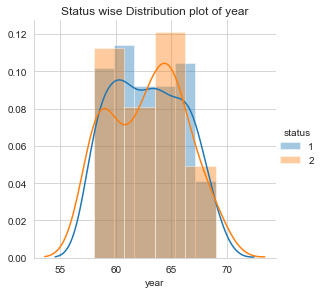

In [128]:
sns.FacetGrid(hab, hue="status", size=4) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Status wise Distribution plot of year')
plt.show();

More people who were operated from 1965 to 1967 didnt survive past 5 years

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
****************************************************
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


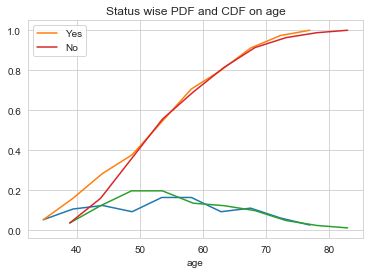

In [129]:
counts, bin_edges = np.histogram(hab_1['age'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf, label='Yes')
plt.xlabel('year')


print('****************************************************')

counts, bin_edges = np.histogram(hab_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label='No')
plt.xlabel('age')


plt.title('Status wise PDF and CDF on age')
plt.legend()
plt.show();


Observation
1.From the plot we can see that the death or survival is almost same for people above the age 48


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


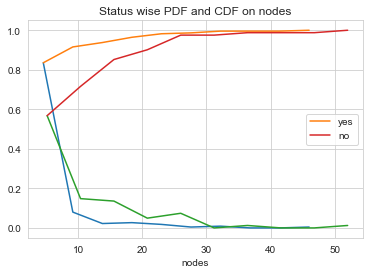

In [130]:
counts, bin_edges = np.histogram(hab_1['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label='yes')

counts, bin_edges = np.histogram(hab_2['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label='no')
plt.xlabel('nodes')
plt.legend()
plt.title('Status wise PDF and CDF on nodes')
plt.show();

Observartion: Around 82% of the people who survived have 0-4 nodes

# (3.5) Mean, Variance and Std-dev

In [131]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(hab_1["year"]))
#Mean with an outlier.
print(np.mean(np.append(hab_1["year"],5000)));
print(np.mean(hab_2["year"]))


print("\nStd-dev:");
print(np.std(hab_1["nodes"]))
print(np.std(hab_2["nodes"]))






Means:
62.86222222222222
84.70796460176992
62.82716049382716

Std-dev:
5.857258449412131
9.128776076761632


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [132]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(hab_1["year"]))
#Median with an outlier
print(np.median(np.append(hab_2["year"],50)));
print(np.median(hab_1["age"]))
print(np.median(hab_2["age"]))


print("\nQuantiles:")
print(np.percentile(hab_1["year"],np.arange(0, 100, 25)))
print(np.percentile(hab_1["age"],np.arange(0, 100, 25)))
print(np.percentile(hab_1["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(hab_1["year"],90))
print(np.percentile(hab_1["age"],90))
print(np.percentile(hab_1["nodes"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hab_1["year"]))
print(robust.mad(hab_1["age"]))
print(robust.mad(hab_1["nodes"]))


Medians:
63.0
63.0
52.0
53.0

Quantiles:
[58. 60. 63. 66.]
[30. 43. 52. 60.]
[0. 0. 0. 3.]

90th Percentiles:
67.0
67.0
8.0

Median Absolute Deviation
4.447806655516806
13.343419966550417
0.0


# (3.7) Box plot and Whiskers

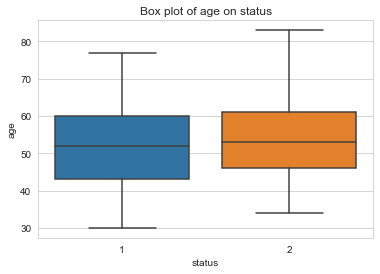

In [133]:
sns.boxplot(x='status',y='age', data=hab)
plt.title('Box plot of age on status')
plt.show()

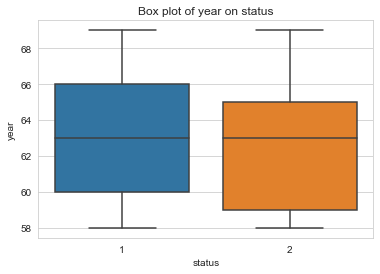

In [134]:

sns.boxplot(x='status',y='year', data=hab)
plt.title('Box plot of year on status')
plt.show()

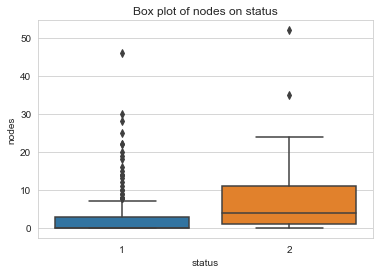

In [135]:

sns.boxplot(x='status',y='nodes', data=hab)
plt.title('Box plot of nodes on status')
plt.show()

# (3.8) Violin plots

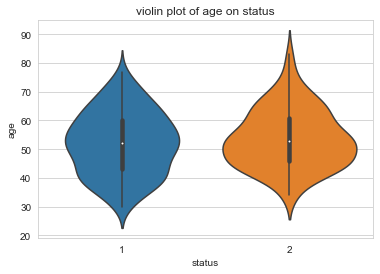

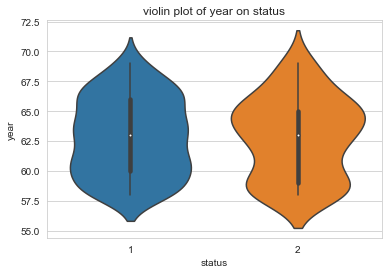

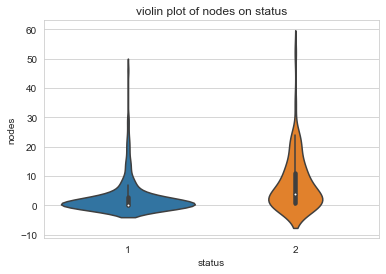

In [136]:
sns.violinplot(x='status',y='age',data = hab,height = 7)
plt.title('violin plot of age on status')
plt.show()
sns.violinplot(x='status',y='year',data = hab,height = 7)
plt.title('violin plot of year on status')
plt.show()
sns.violinplot(x='status',y='nodes',data = hab,height = 7)
plt.title('violin plot of nodes on status')
plt.show()

Observations:
1.Patients with zero or 1 nodes are likely to survive. Survival rate  decreases with the increase in nodes.
2.More people who got operated in the year 1965 did not survive for more than 5 years.
3.More people in the age group 45 to 60 who did not survive.
4.The number of patients that lived more than 5 years is almost double of the ones that did not. 

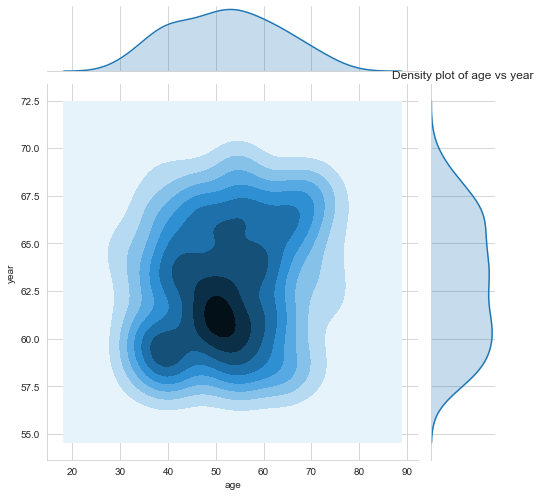

In [137]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="year", data=hab_1, kind="kde",height=7);
plt.title('Density plot of age vs year')
plt.show();


Most operations were done in 1960 to 1962 and on people of ages 48-55